### Projet 'medical_student'👨‍⚕️🎓
#### Nom et prénom : Amekrane Israe 

# ***1️⃣Importation des bibliothéque nécessaire:***

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# ***2️⃣Importation de dataset:***

In [221]:
df=pd.read_csv('medical_students_dataset.csv')
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,18.0,Male,157.667536,NaN,O,39.161246,98.860224,91.0,100.0,246.0,Yes,No
996,997.0,NaN,Male,NaN,97.573629,A,35.936191,NaN,76.0,113.0,122.0,No,No
997,998.0,19.0,NaN,151.984932,NaN,A,27.866615,99.229365,94.0,135.0,246.0,No,No
998,999.0,18.0,Male,151.655273,58.077304,A,25.251747,98.607093,63.0,NaN,237.0,No,Yes


# ***Explication des colones:***

**Student ID** : L'identifiant unique de chaque étudiant. Il sert à distinguer chaque étudiant dans la base de données.

**Age** : L'âge de l'étudiant en années. Cela peut influencer des aspects tels que le métabolisme, les habitudes de vie, etc.

**Gender** : Le sexe de l'étudiant. Cela peut être un facteur dans des études de santé, mais peut être également une variable à transformer pour l'analyse (homme/femme).

**Height** : La taille de l'étudiant en centimètres. Cela peut être lié à des mesures corporelles comme le BMI.

**Weight** : Le poids de l'étudiant en kilogrammes. Ce facteur est souvent utilisé pour calculer le BMI (indice de masse corporelle).

**Blood Type** : Le groupe sanguin de l'étudiant (A, B, AB, O). Bien qu'il soit une donnée intéressante, il est souvent peu influent dans les analyses de santé standards.

**BMI (Body Mass Index)** : L'indice de masse corporelle de l'étudiant. C'est une mesure utilisée pour évaluer si une personne a un poids santé en fonction de sa taille et de son poids. C'est souvent la cible d'un modèle de régression.

**Temperature** : La température corporelle de l'étudiant, généralement autour de 37°C pour une personne en bonne santé. Peut être utile pour des études sur la fièvre ou des anomalies.

**Heart Rate** : Le nombre de battements du cœur par minute. C'est une mesure importante pour l'évaluation de la santé cardiaque et peut varier en fonction de l'âge, de l'activité physique, etc.

**Blood Pressure** : La pression artérielle de l'étudiant, mesurée généralement en systolique/diastolique (ex. 120/80). C'est une mesure clé pour évaluer la santé cardiovasculaire.

**Cholesterol** : Le niveau de cholestérol dans le sang. C'est un indicateur important pour les risques de maladies cardiaques.

**Diabetes** : Indication si l'étudiant a le diabète (Oui/Non). C'est une variable binaire qui pourrait être un bon candidat pour un modèle de classification.

**Smoking** : Indication si l'étudiant fume (Oui/Non). Cela peut affecter divers paramètres de santé comme la pression sanguine, le cœur, etc. C'est également une variable binaire.

# ***3️⃣Les informations pricipaux sur dataset🧮***

In [222]:
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [223]:
df.shape

(1000, 13)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student ID      922 non-null    float64
 1   Age             893 non-null    float64
 2   Gender          892 non-null    object 
 3   Height          900 non-null    float64
 4   Weight          890 non-null    float64
 5   Blood Type      898 non-null    object 
 6   BMI             892 non-null    float64
 7   Temperature     900 non-null    float64
 8   Heart Rate      913 non-null    float64
 9   Blood Pressure  891 non-null    float64
 10  Cholesterol     923 non-null    float64
 11  Diabetes        899 non-null    object 
 12  Smoking         882 non-null    object 
dtypes: float64(9), object(4)
memory usage: 101.7+ KB


In [225]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,922.000000,893.000000,900.000000,890.000000,892.000000,900.000000,913.000000,891.000000,923.000000
mean,502.733189,25.940649,174.105841,69.650896,23.397458,98.631681,79.304491,114.694725,185.401950
std,288.958259,5.023025,14.617019,16.976793,7.090967,0.506493,11.696610,14.487382,37.788225
min,1.000000,18.000000,150.044011,40.172104,10.207604,97.240649,60.000000,90.000000,120.000000
25%,250.250000,21.000000,161.343453,54.777413,17.943462,98.275271,69.000000,102.000000,152.500000
50%,503.500000,26.000000,173.889867,69.734272,22.536315,98.641575,79.000000,115.000000,185.000000
75%,752.750000,30.000000,186.750337,84.087516,28.140947,98.990021,90.000000,128.000000,218.500000
max,1000.000000,34.000000,199.989772,99.958789,44.011998,100.354844,99.000000,139.000000,249.000000


# ***4️⃣Data cleaning👨‍💻***

## Suppression des colonnes qui ne sont pas intéressantes:

In [226]:
df = df.drop(['Student ID', 'Height','Blood Type', 'Blood Pressure'], axis=1)

## Traitment des valeurs manquants:

In [227]:
df.isnull().sum()

Age            107
Gender         108
Weight         110
BMI            108
Temperature    100
Heart Rate      87
Cholesterol     77
Diabetes       101
Smoking        118
dtype: int64

In [228]:
df = df.dropna()

In [229]:
#Vérification

df.isnull().sum()

Age            0
Gender         0
Weight         0
BMI            0
Temperature    0
Heart Rate     0
Cholesterol    0
Diabetes       0
Smoking        0
dtype: int64

##  📉Visualisation des valeurs numerique

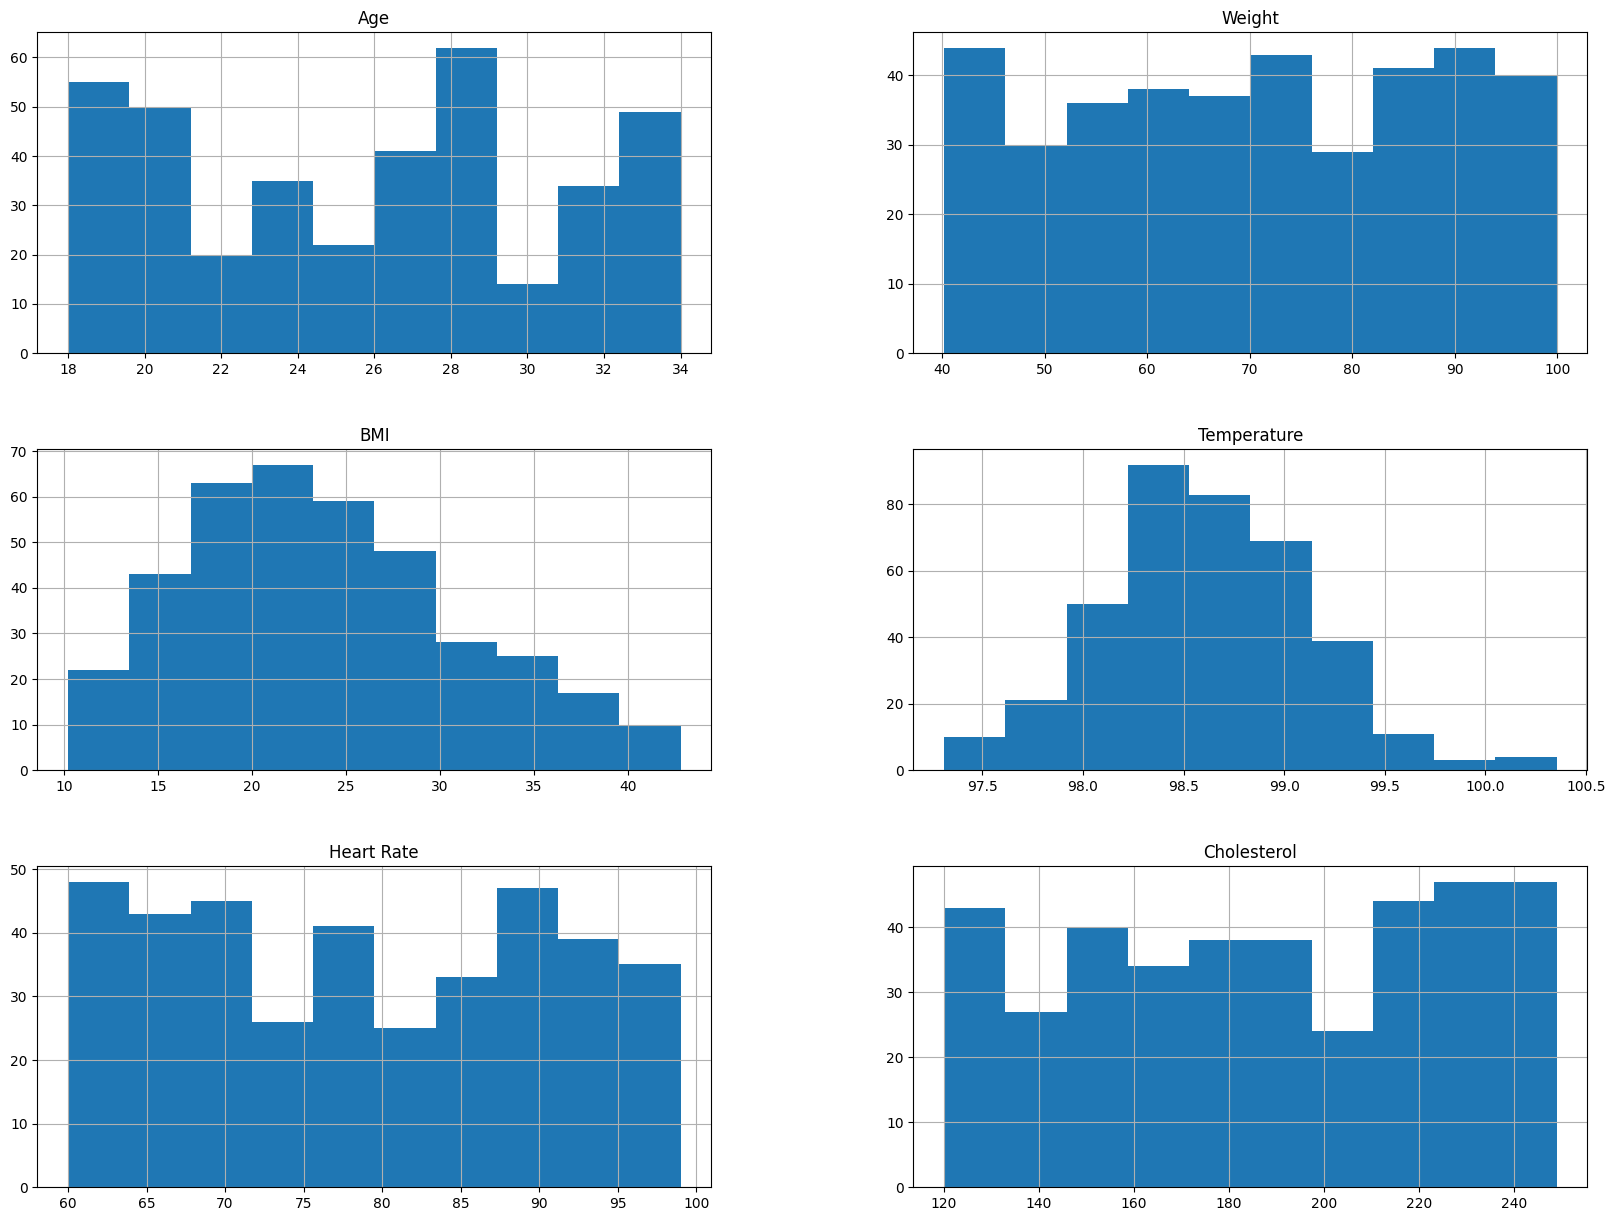

In [230]:
df.hist(figsize = (20,15))
plt.show()

# Outliers

In [231]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    # print(f"Intervalle accepté pour {column}: [{lower_limit}, {upper_limit}]")
    print(f"Outliers détectés {column} : {len(outliers)}")

    
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

def detect_all_outliers(df):
    for column in df.columns:  
        if df[column].dtype in ['int64', 'float64']:
            detect_outliers(df, column)

In [232]:
detect_all_outliers(df)

Outliers détectés Age : 0
Outliers détectés Weight : 0
Outliers détectés BMI : 0
Outliers détectés Temperature : 4
Outliers détectés Heart Rate : 0
Outliers détectés Cholesterol : 0


In [233]:
df = remove_outliers(df, 'Temperature')
df = remove_outliers(df, 'BMI')

## Traitement des valeurs doublans

In [234]:
df.duplicated().sum()

np.int64(0)

# ***5️⃣Data analyse🔍***

#### 1. Afficher maximals et minimals d'age 

In [235]:
df['Age'].min()

np.float64(18.0)

In [236]:
df['Age'].max()

np.float64(34.0)

#### 2.Afficher  pour chaque Genre d'etudiant  le maximum de Smoking         

In [237]:
df.groupby('Gender')[['Smoking']].max()

,Smoking
Gender,
Female,Yes
Male,Yes


#### 3. Quelle est la distribution d'âge des étudiants ?

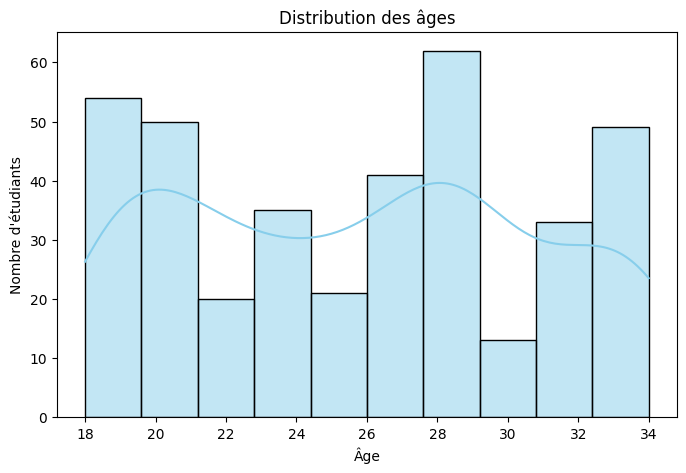

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=10, kde=True, color='skyblue')
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Nombre d'étudiants")
plt.show()

#### 4. Quelle est la répartition par genre ?

C:\Users\HP\AppData\Local\Temp\ipykernel_9796\2715672589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


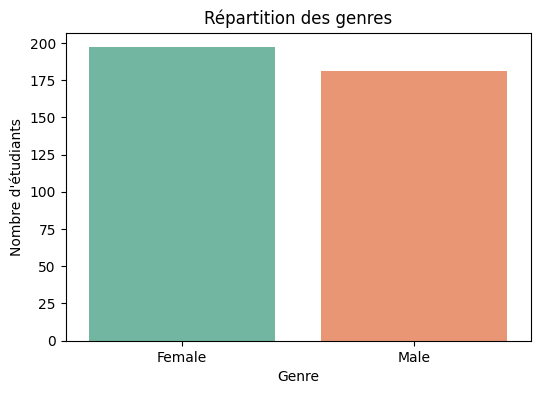

In [239]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Répartition des genres")
plt.xlabel("Genre")
plt.ylabel("Nombre d'étudiants")
plt.show()

#### 5.Y a-t-il un lien entre smoking et diabète ?

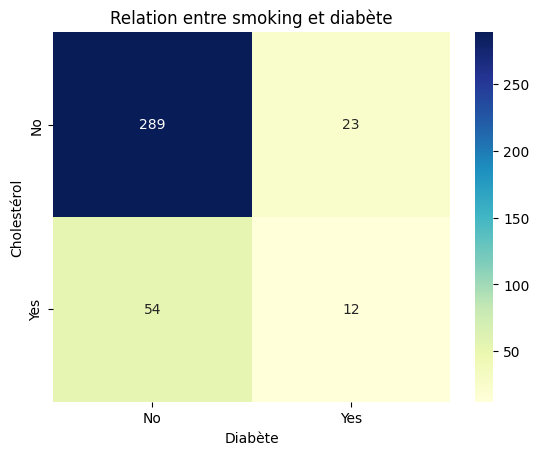

In [240]:
cross_tab = pd.crosstab(df["Smoking"], df["Diabetes"])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Relation entre smoking et diabète")
plt.xlabel("Diabète")
plt.ylabel("Cholestérol")
plt.show()

#### 6. Quelle est la distribution de l’indice de masse corporelle (BMI) ?

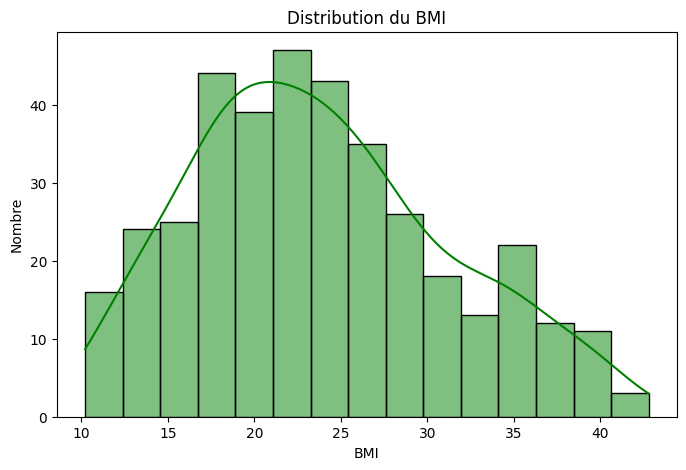

In [241]:
plt.figure(figsize=(8, 5))
sns.histplot(df["BMI"], bins=15, kde=True, color='green')
plt.title("Distribution du BMI")
plt.xlabel("BMI")
plt.ylabel("Nombre")
plt.show()

#### 7. Est-ce que l’âge influence les maladies ?

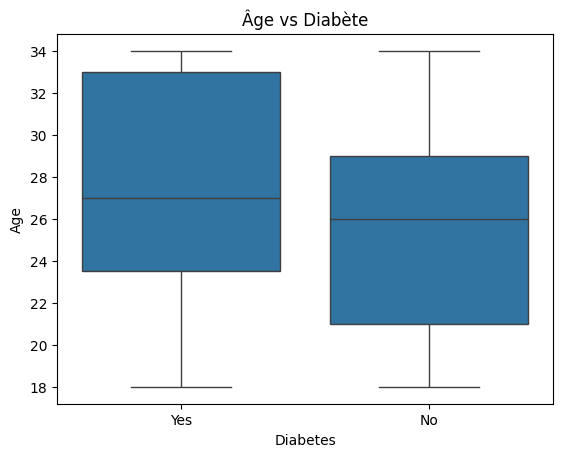

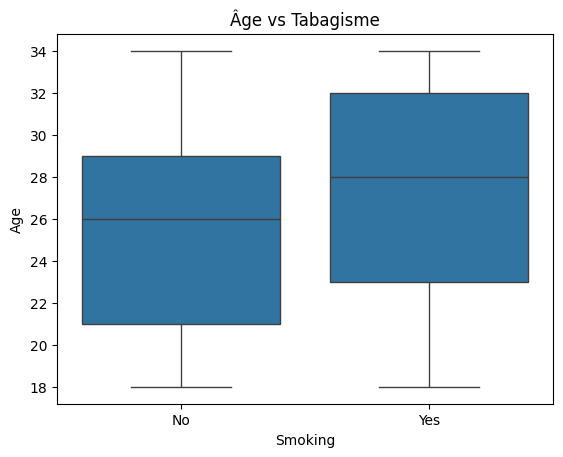

In [242]:
sns.boxplot(x="Diabetes", y="Age", data=df)
plt.title("Âge vs Diabète")
plt.show()



sns.boxplot(x="Smoking", y="Age", data=df)
plt.title("Âge vs Tabagisme")
plt.show()

#### 8. Quel est l'âge moyen d'etudiants pour chaque genre

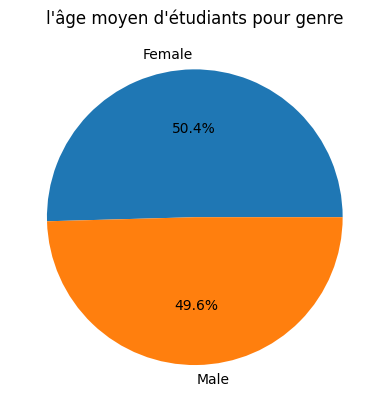

In [243]:
catg_age = df.groupby('Gender')['Age'].mean()
sizes = catg_age.values
labels = catg_age.index

plt.pie(sizes, labels=labels ,autopct='%1.1f%%')
plt.title("l'âge moyen d'étudiants pour genre")
plt.show()

# ***6️⃣Feature Scaling***

In [244]:
df.head(n=1)

,Age,Gender,Weight,BMI,Temperature,Heart Rate,Cholesterol,Diabetes,Smoking
2,32.0,Female,55.741083,16.729017,98.260293,76.0,216.0,Yes,No


In [245]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['Diabetes'] = encoder.fit_transform(df[['Diabetes']])
df['Smoking'] = encoder.fit_transform(df[['Smoking']])
df['Gender'] = encoder.fit_transform(df[['Gender']])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


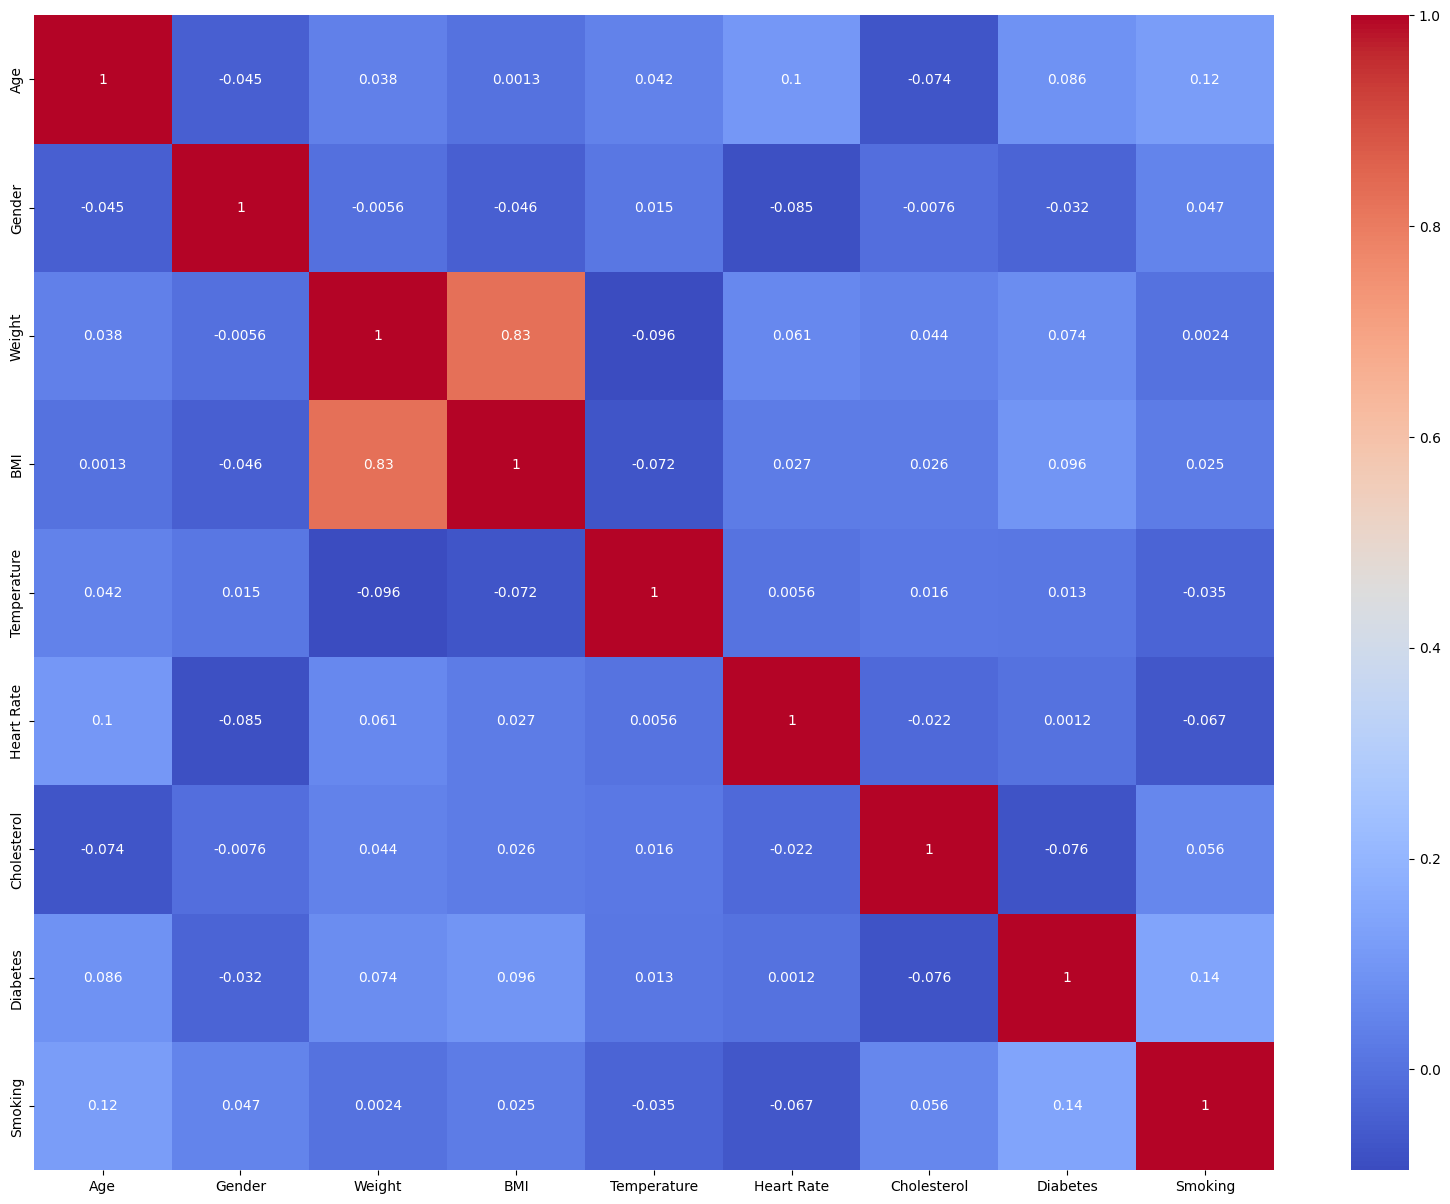

In [246]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# ***7️⃣Data Preparation***

In [247]:
x =  df.drop(columns=['Diabetes'])
y = df['Diabetes']

## feature engineering

In [248]:
from imblearn.over_sampling import SMOTE
# Align x and y to ensure they have the same indices
x, y = x.align(y, join='inner', axis=0)
smote = SMOTE()
x_res, y_res = smote.fit_resample(x, y)

## Séparation des données

In [249]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (548, 8), Test size: (138, 8)


#### Modele de Regression Logistic :

Accuracy: 0.67
F1 Score: 0.63
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        78
           1       0.61      0.67      0.63        60

    accuracy                           0.67       138
   macro avg       0.66      0.67      0.66       138
weighted avg       0.67      0.67      0.67       138



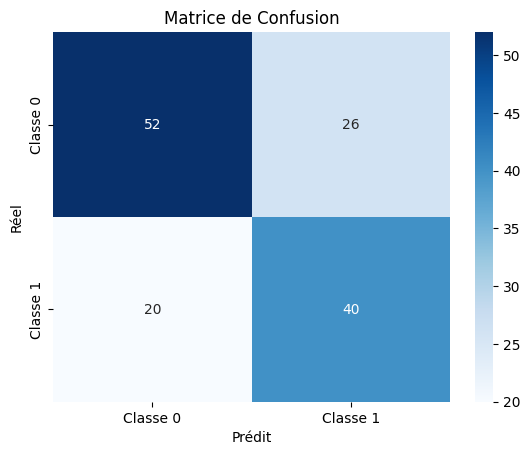

In [250]:
Logistic = LogisticRegression(fit_intercept=True, C=1, penalty='l2', solver='newton-cg', random_state=42)
Logistic.fit(X_train, y_train)
 # Prédiction sur les données de test
y_pred_Logistic = Logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_Logistic)
print(f"Accuracy: {accuracy:.2f}")
 # F1-score du modèle
f1 = f1_score(y_test, y_pred_Logistic)
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred_Logistic))
 # Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_Logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()


#### KNN

Modèle KNN entraîné avec k=75.
Précision du modèle KNN: 0.67
F1-score du modèle KNN: 0.68
              precision    recall  f1-score   support

    Classe 0       0.90      0.36      0.51        78
    Classe 1       0.53      0.95      0.68        60

    accuracy                           0.62       138
   macro avg       0.72      0.65      0.60       138
weighted avg       0.74      0.62      0.59       138



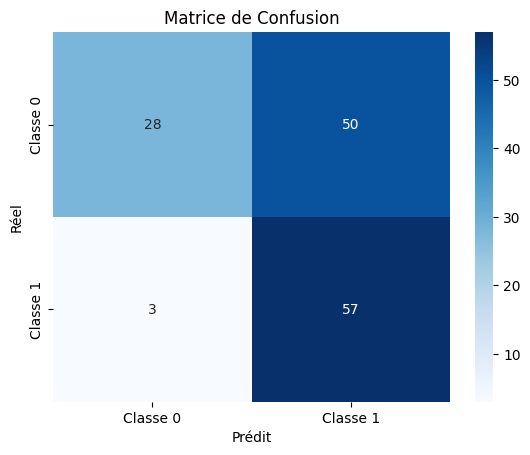

In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Définition du modèle KNN avec k=5

k = 75

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print(f"Modèle KNN entraîné avec k={k}.")

# Évaluation du Modèle

# Prédictions sur les données de test
y_pred_knn = knn.predict(X_test)

# Calcul de l'accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Précision du modèle KNN: {accuracy:.2f}")
f1_knn = f1_score(y_test, y_pred_knn)
print(f"F1-score du modèle KNN: {f1_knn:.2f}")

target_names = ['Classe 0', 'Classe 1']
#  print("Rapport de classification :")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

# Matrice de confusion
conf_matrix_KNN = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()



#### Decision Tree

Précision du modèle : 0.74
F1-score du modèle : 0.74


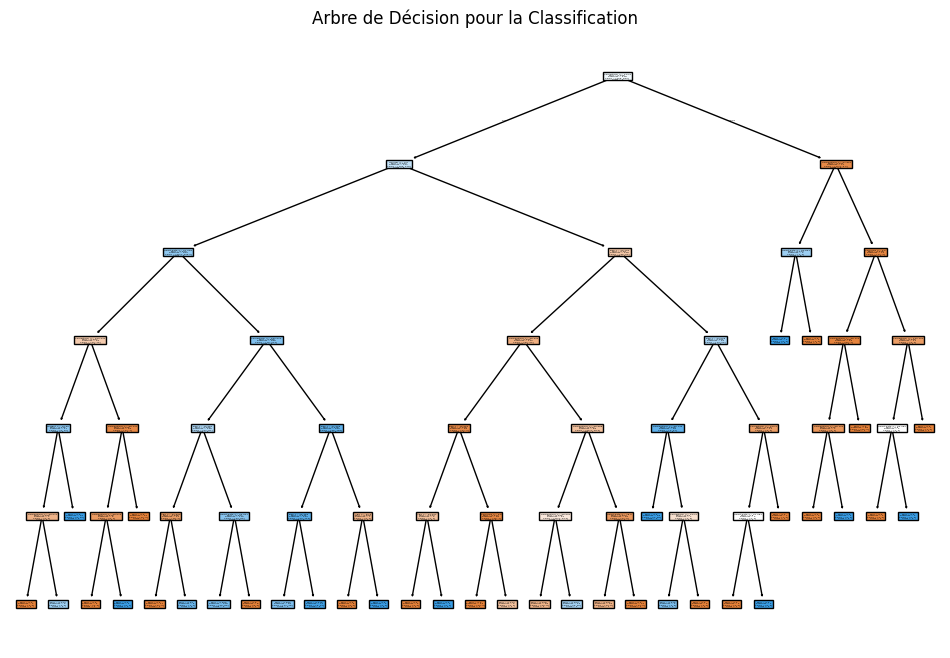

In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Création et entraînement du modèle Decision Tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=42)
dt.fit(X_train, y_train)

# Prédiction sur les données test
y_pred_dt = dt.predict(X_test)

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Précision du modèle : {accuracy_dt:.2f}")
f1_dt = f1_score(y_test, y_pred_dt)
print(f"F1-score du modèle : {f1_dt:.2f}")

# Visualisation de l’arbre de décision
plt.figure(figsize=(12, 8))
tree.plot_tree(
    dt, 
    filled=True, 
    feature_names=df.drop(columns=['Diabetes']).columns,  # Utilisation des noms des features
    class_names=y_train.unique().astype(str) )
plt.title("Arbre de Décision pour la Classification")
plt.show()

#### Random Forest

Précision du modèle Random Forest : 0.67
F1-score du modèle Random Forest : 0.89
Rapport de classification :
              precision    recall  f1-score   support

    Classe 0       0.93      0.88      0.91        78
    Classe 1       0.86      0.92      0.89        60

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



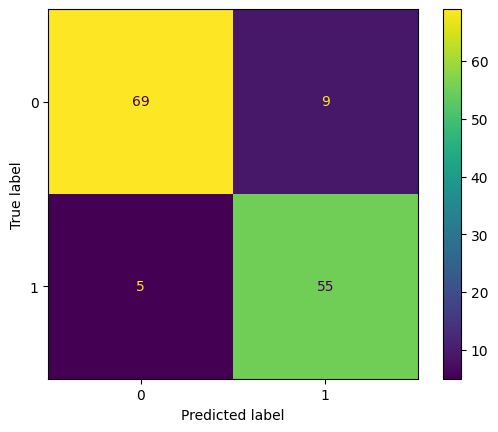

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Définition et entraînement du modèle Random Forest
rf1 = RandomForestClassifier(n_estimators=74,random_state=42)
rf1.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf1.predict(X_test)

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Précision du modèle Random Forest : {accuracy:.2f}")
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1-score du modèle Random Forest : {f1_rf:.2f}")

# Rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_estimator(rf1, X_test, y_test)
plt.show()


#### SVM

Accuracy: 0.61
F1 Score: 0.61
              precision    recall  f1-score   support

           0       0.71      0.51      0.60        78
           1       0.54      0.73      0.62        60

    accuracy                           0.61       138
   macro avg       0.63      0.62      0.61       138
weighted avg       0.64      0.61      0.61       138



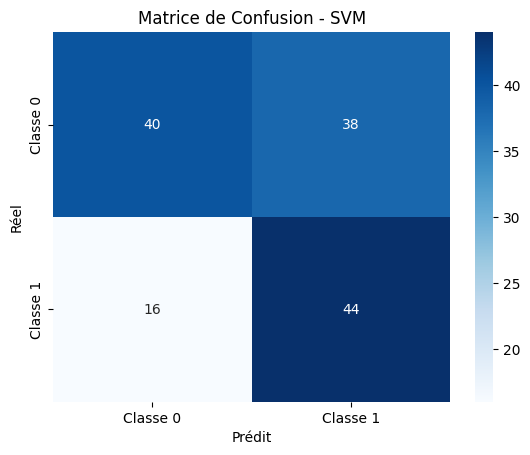

In [254]:
from sklearn.svm import SVC


# Initialisation et entraînement du modèle SVM
svm = SVC(kernel='linear', random_state=42)  # Vous pouvez changer 'linear' par 'rbf', 'poly', etc.
svm.fit(X_train, y_train)

# Prédiction
y_pred_svm = svm.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")

# F1-score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_svm:.2f}")

# Rapport de classification
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
conf_matrix5 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - SVM')
plt.show()


In [255]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.6386488740617181
Average accuracy: 0.6386488740617181


In [256]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.7390658882402001
Average accuracy: 0.7390658882402001


In [257]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf1, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.8740283569641367
Average accuracy: 0.8740283569641367


In [258]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X_train, y_train, cv=5)
print(scores.mean())
# print("Scores:", scores)
print("Average accuracy:", scores.mean())

0.6497247706422018
Average accuracy: 0.6497247706422018


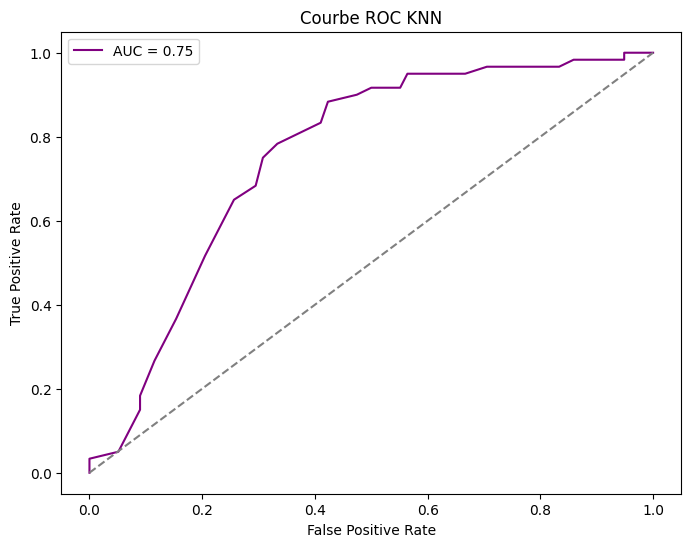

In [259]:

# Calcul de la courbe ROC
y_scores1 = knn.predict_proba(X_test)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='purple', label=f'AUC = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC KNN')
plt.legend()
plt.show()


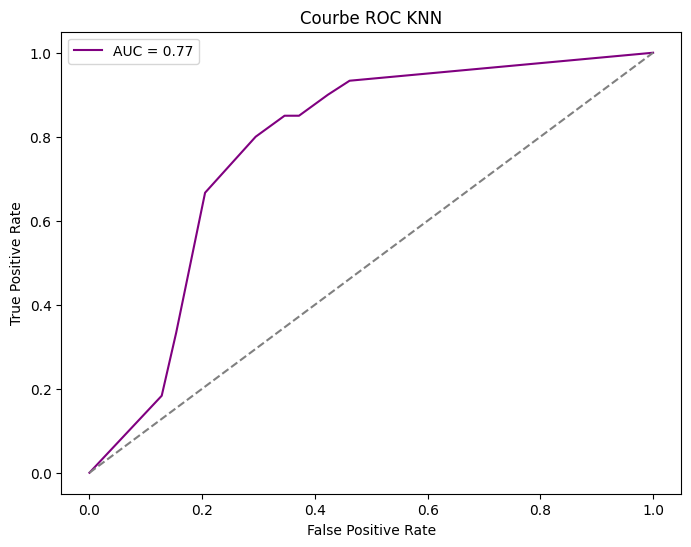

In [260]:

# Calcul de la courbe ROC
y_scores2 = dt.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='purple', label=f'AUC = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC KNN')
plt.legend()
plt.show()


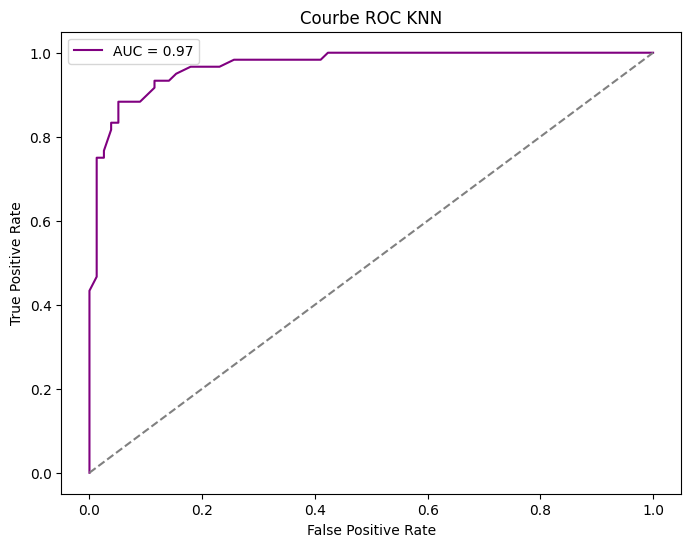

In [261]:

# Calcul de la courbe ROC
y_scores3 = rf1.predict_proba(X_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='purple', label=f'AUC = {roc_auc3:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC KNN')
plt.legend()
plt.show()


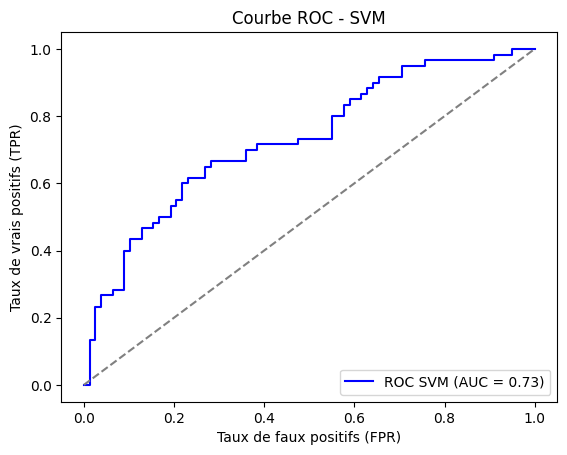

In [262]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_scores4 = svm.predict_proba(X_test)[:, 1]
fpr4, tpr4, _ = roc_curve(y_test, y_scores4)
roc_auc4 = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='blue', label=f'ROC SVM (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - SVM')
plt.legend(loc='lower right')
plt.show()

## Comparaison de tous les modèles

In [263]:

models = {
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=50, random_state=42),
    "SVM": SVC(kernel='rbf' , probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=500,random_state=42),#250
    "Logistic Regression": LogisticRegression(max_iter=800 , C=2.0)#400
}


# 4. Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    print(f"{name}:\n  Accuracy: {acc:.2f}\n  F1 Score: {f1:.2f}\n")


KNN:
  Accuracy: 0.81
  F1 Score: 0.81

Decision Tree:
  Accuracy: 0.83
  F1 Score: 0.83

SVM:
  Accuracy: 0.60
  F1 Score: 0.58

Random Forest:
  Accuracy: 0.93
  F1 Score: 0.93

Logistic Regression:
  Accuracy: 0.66
  F1 Score: 0.66



## **💡Résultats**

-Voici les performances :

Le modèle Random Forest est le plus performant avec une accuracy de 0.93 et un F1-score de 0.93.

L’arbre de décision arrive en deuxième position avec une accuracy de 0.83 et un F1-score de 0.83.

Le KNN montre également de bonnes performances avec une accuracy de 0.81 et un F1-score de 0.81.

Le Logistic Regression donne des résultats moyens avec une accuracy de 0.66 et un F1-score de 0.66.

Enfin, le SVM est le moins performant avec une accuracy de 0.60 et un F1-score de 0.58.

KNN:
  Accuracy: 0.81
  F1 Score: 0.81



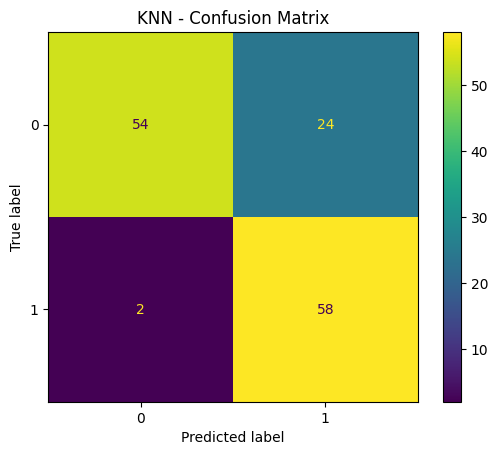

  AUC Score: 0.83



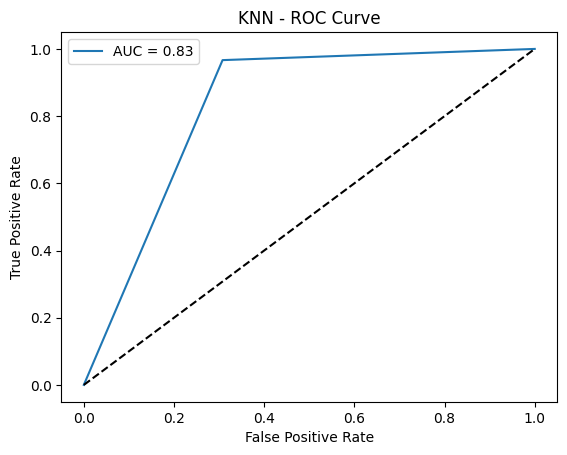

Decision Tree:
  Accuracy: 0.83
  F1 Score: 0.83



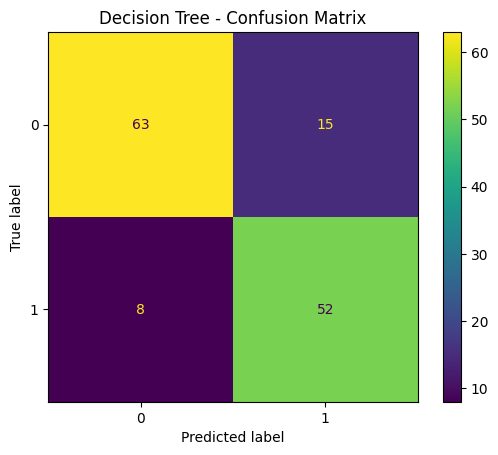

  AUC Score: 0.84



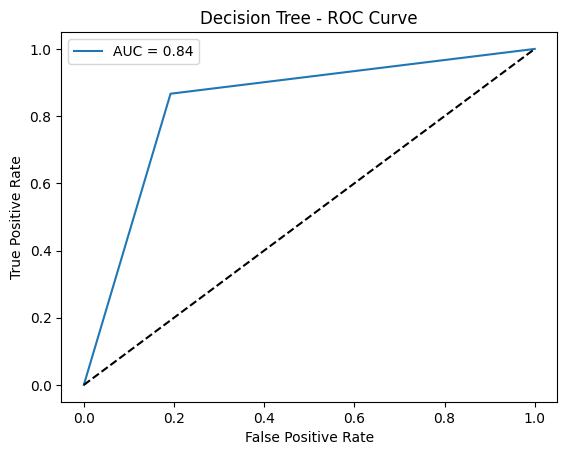

SVM:
  Accuracy: 0.60
  F1 Score: 0.58



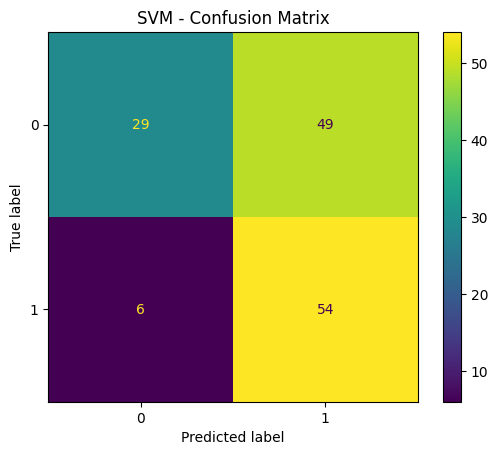

  AUC Score: 0.75



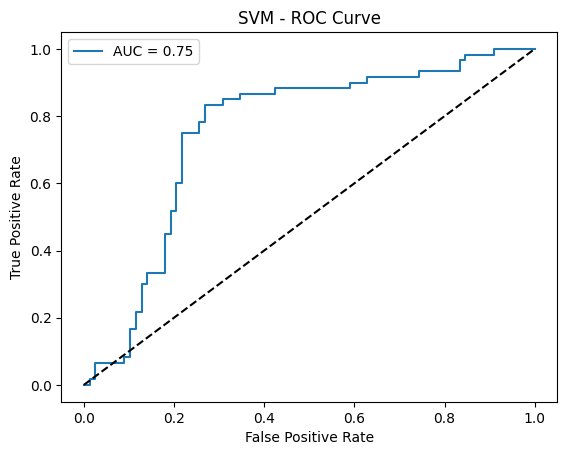

Random Forest:
  Accuracy: 0.93
  F1 Score: 0.93



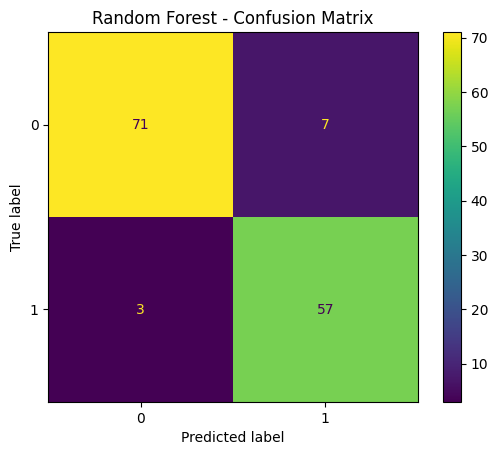

  AUC Score: 0.97



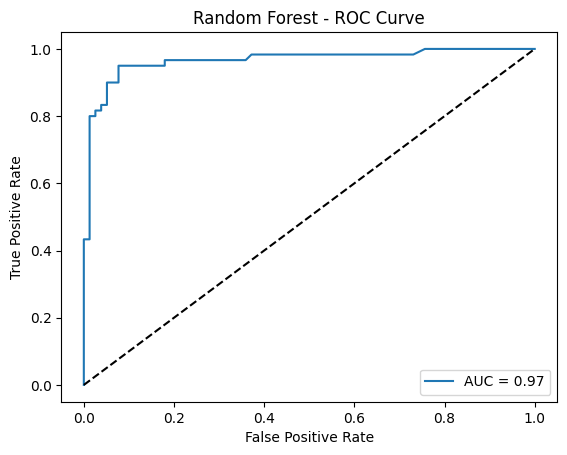

Logistic Regression:
  Accuracy: 0.66
  F1 Score: 0.66



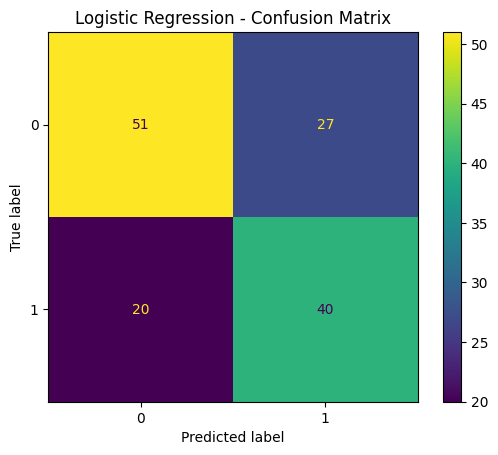

  AUC Score: 0.73



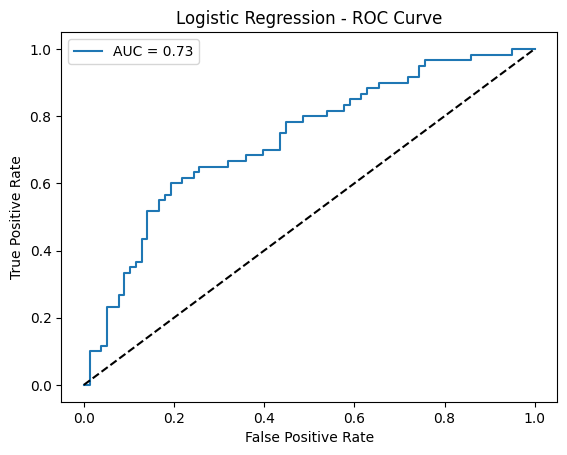

In [264]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import label_binarize

models = {
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=50, random_state=42),
    "SVM": SVC(kernel='rbf' , probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=250,random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=800 , C=1.0)
}

# 4. Train, predict, and evaluate
for name, model1 in models.items():
    model1.fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass
    print(f"{name}:\n  Accuracy: {acc:.2f}\n  F1 Score: {f1:.2f}\n")

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1] if y_test_bin.ndim > 1 else 1
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    if hasattr(model, "predict_proba"):
        y_score = model1.predict_proba(X_test)

        if n_classes > 1:
            # multiclass
            y_test_bin = label_binarize(y_test, classes=np.unique(y))
            auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='weighted')
            RocCurveDisplay.from_predictions(y_test_bin.ravel(), y_score.ravel())
        else:
            # binary
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
            auc = roc_auc_score(y_test, y_score[:, 1])
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"{name} - ROC Curve")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()

        print(f"  AUC Score: {auc:.2f}\n")
        plt.show()
    else:
        print("  AUC not available (no predict_proba)\n")

## Les courbes ROC

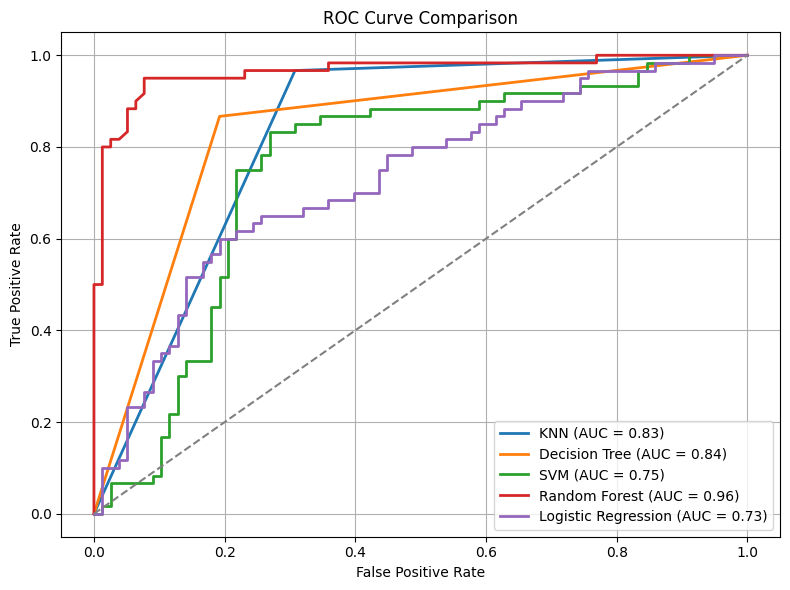

In [265]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=50, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=350, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=800, C=1.0)
}

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, model1 in models.items():
    model1.fit(X_train, y_train)
    if hasattr(model1, "predict_proba"):
        y_prob = model1.predict_proba(X_test)[:, 1]
    else:
        y_prob = model1.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## L'enregistreemnt de modele

In [266]:
import pickle
# save the model to disk

with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [267]:
import pickle
 # save the model to disk
with open('rf1.pkl', 'wb') as file:
    pickle.dump(rf1, file)


In [268]:
# load the model from disk
with open('rf1.pkl', 'rb') as file:
 loaded_model = pickle.load(file)

## Prediction avec le modele enregistrer

In [269]:
loaded_model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

# ***8️⃣Non supervisé***

## Normalisation

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

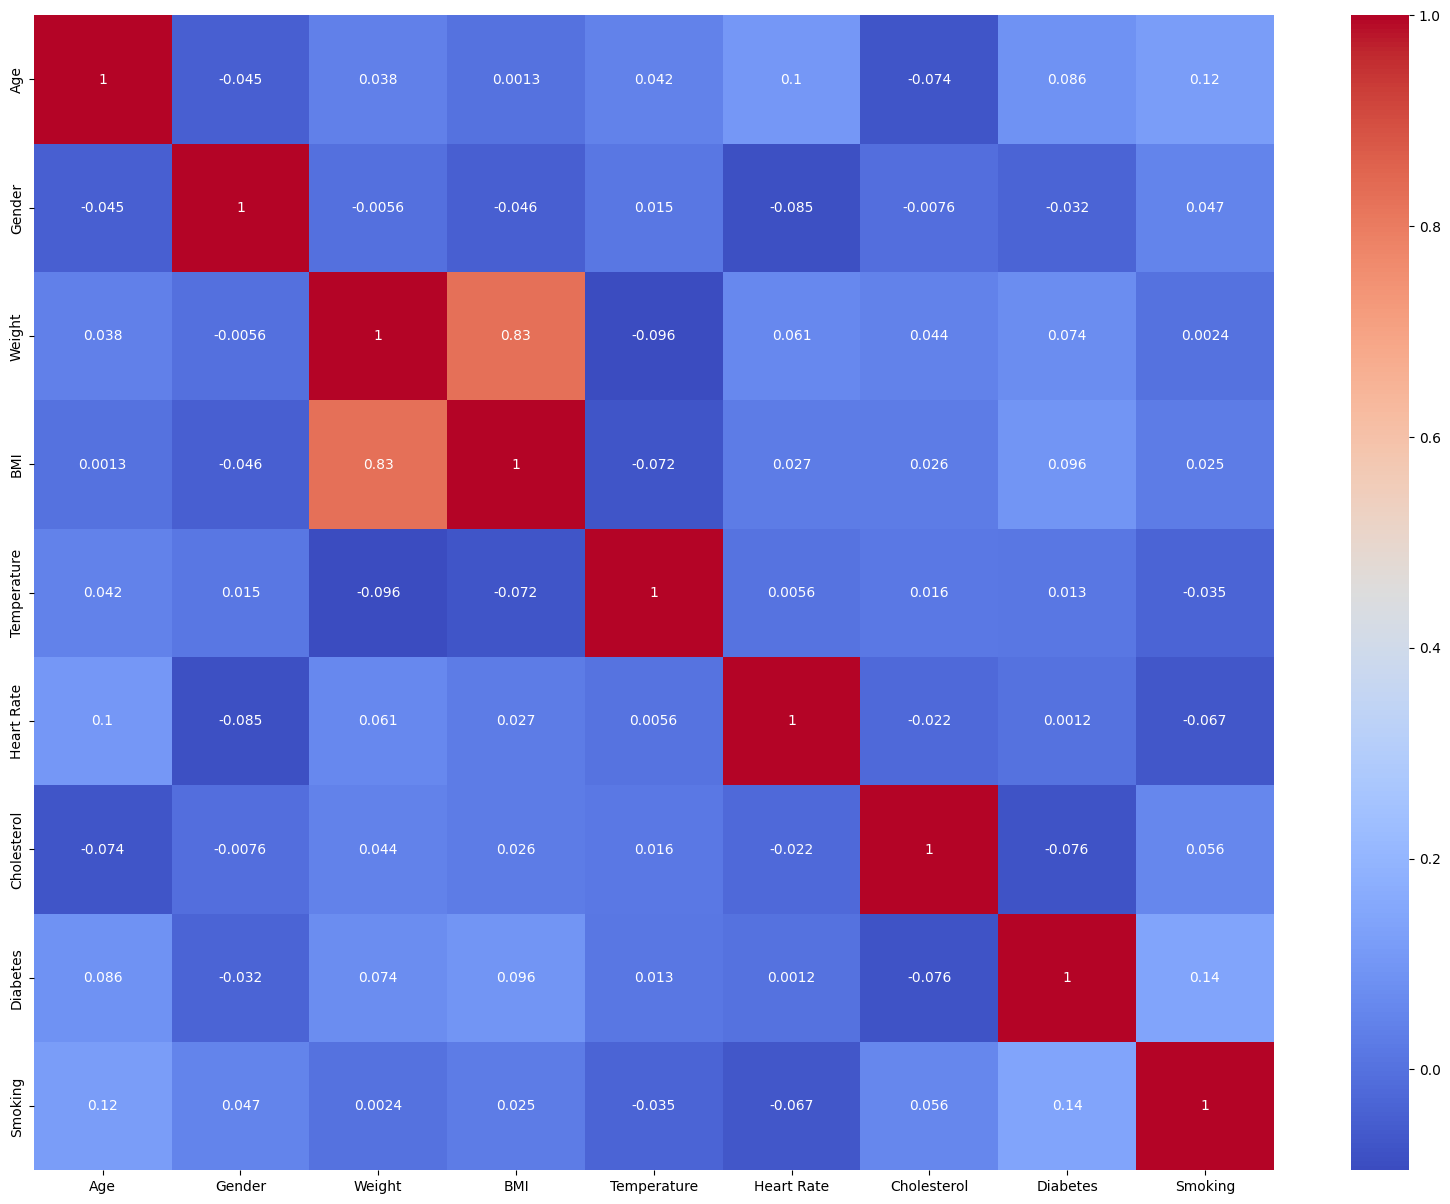

In [271]:
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Importation des bibliothéque

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Normaliser les colonnes numériques

## 📉 Méthode du Coude K

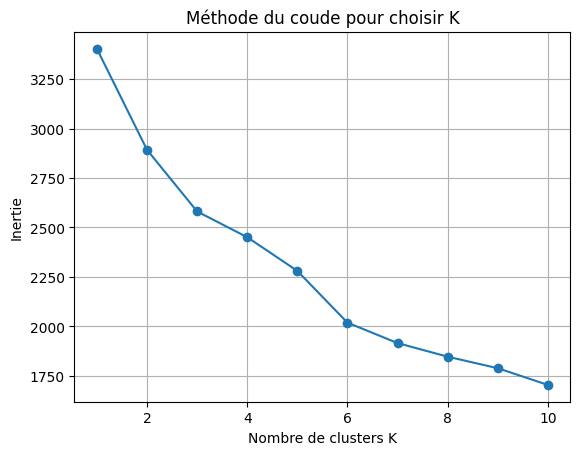

In [274]:

# Calculer l'inertie pour différents K
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude pour choisir K")
plt.grid(True)
plt.show()


## 🤖 Clustering avec KMeans (K=4)

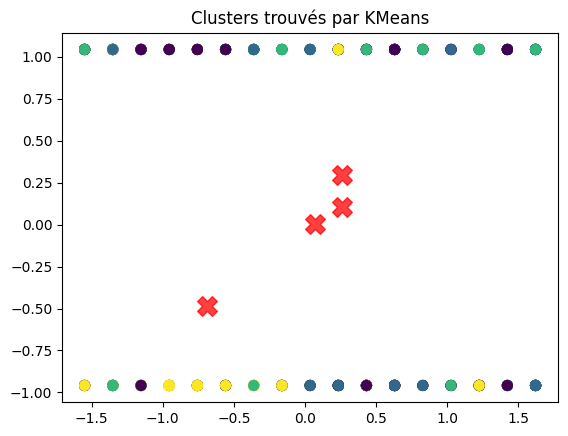

In [275]:

# Appliquer KMeans avec K=3
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)

# Affichage des clusters trouvés
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusters trouvés par KMeans")
plt.show()


## 📏 Score de Silhouette pour K=2 à K=6

In [276]:

# Calcul du score de silhouette pour K=2 à K=6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, y_pred)
    print(f"K = {k} -> Silhouette Score = {score:.2f}")


K = 2 -> Silhouette Score = 0.14
K = 3 -> Silhouette Score = 0.11
K = 4 -> Silhouette Score = 0.13
K = 5 -> Silhouette Score = 0.14
K = 6 -> Silhouette Score = 0.14


In [277]:
from sklearn.decomposition import PCA
# Appliquer PCA pour réduire à 2 dimensions
pca = PCA(n_components=2) 
df_reduced = pca.fit_transform(df_scaled)

# Afficher les composantes principales
print("Composantes principales:\n", pca.components_)
print("Variance expliquée par chaque composante:\n", pca.explained_variance_ratio_)


Composantes principales:
 [[ 0.0550592  -0.05577794  0.68832966  0.68737608 -0.12945601  0.07615919
   0.03788272  0.14472437  0.05132624]
 [ 0.60448249 -0.12531802 -0.09578795 -0.0899512   0.11352829  0.18029559
  -0.28330724  0.52780398  0.44429108]]
Variance expliquée par chaque composante:
 [0.20807537 0.13765617]


## 🧭 Visualisation des Clusters KMeans

C:\Users\HP\AppData\Local\Temp\ipykernel_9796\1190474797.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_reduced[:, 0], df_reduced[:, 1], cmap='viridis')


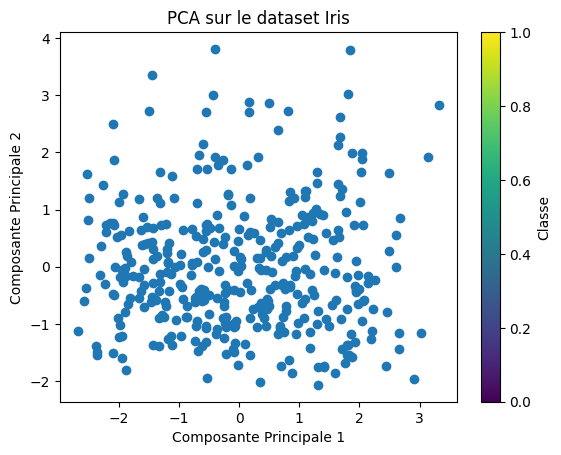

In [278]:
# Visualisation des données réduites
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], cmap='viridis')
plt.title("PCA sur le dataset Iris")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.colorbar(label='Classe')
plt.show()

## 🧭 Clusters trouvés par KMeans (PCA 2D)

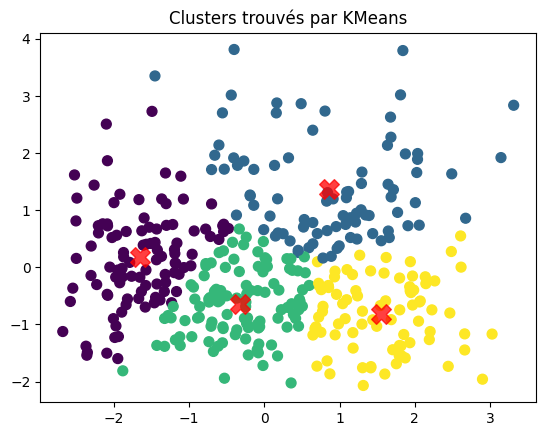

In [280]:

# Appliquer KMeans avec K=3
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_reduced)
y_kmeans = kmeans.predict(df_reduced)

# Affichage des clusters trouvés
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clusters trouvés par KMeans")
plt.show()

## 📊 2. Évaluation du nombre optimal de clusters avec Silhouette Score

In [281]:

# Calcul du score de silhouette pour K=2 à K=8
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_pred = kmeans.fit_predict(df_reduced)
    score = silhouette_score(df_reduced, y_pred)
    print(f"K = {k} -> Silhouette Score = {score:.2f}")


K = 2 -> Silhouette Score = 0.39
K = 3 -> Silhouette Score = 0.39
K = 4 -> Silhouette Score = 0.35
K = 5 -> Silhouette Score = 0.35
K = 6 -> Silhouette Score = 0.36
K = 7 -> Silhouette Score = 0.35


## 🧬 Visualisation 3D après PCA

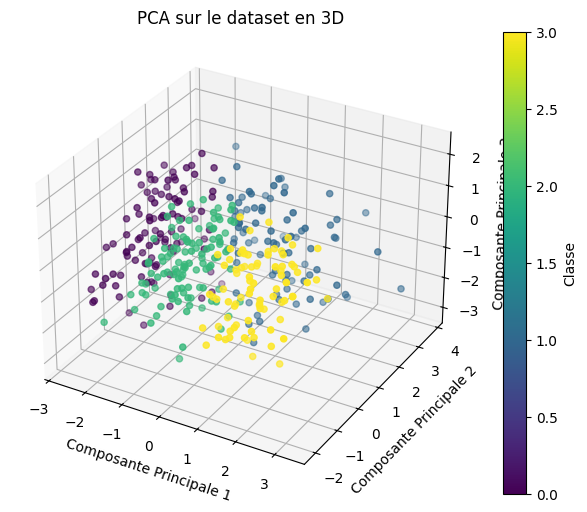

In [282]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA with 3 components
pca_3d = PCA(n_components=4)
df_reduced_3d = pca_3d.fit_transform(df_scaled)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Use y_kmeans for coloring
ax.scatter(df_reduced_3d[:, 0], df_reduced_3d[:, 1], df_reduced_3d[:, 2], c=y_kmeans, cmap='viridis')

ax.set_title("PCA sur le dataset en 3D")
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_zlabel("Composante Principale 3")

plt.colorbar(ax.collections[0], label='Classe')
plt.show()

# ***9️⃣Le deplyoyement de modele🔍***

https://www.kaggle.com/code/israe001amekrane/notebook24b60f01e1